In [40]:
# Necessary Libraries

import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder

## To work on sqlite
### you need to load dataset and create a database

pip install ipython-sql 

To install ipython-sql you need to deactivate the venv and again activate the venv once the installation is finsihed.

<!-- # Load CSV file
df = pd.read_csv('your_file.csv')  # Replace 'your_file.csv' with the actual filename

# Create an SQLite database
engine = create_engine('sqlite:///my_database.sqlite')
df.to_sql('table_name', con=engine, if_exists='replace', index=False)  # Replace 'table_name' as desired -->





## Connect to the Database in Jupyter Notebook

Load the SQL Extension:

<!-- %load_ext sql
 -->

Connect to the New SQLite Database: Connect to the database you just created. Assuming my_database.sqlite is in your working directory:

<!-- %sql sqlite:///my_database.sqlite
 -->


 Query the Database: Now you can write SQL queries directly in Jupyter cells. For example, to view the first few rows of the table:

<!-- %sql SELECT * FROM table_name LIMIT 5;
 -->


 if you are still confused see the comments

In [2]:
df = pd.read_csv("../earth quake/kavrepalanchok_raw.csv")


In [3]:
df.head()

,b_id,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,damage_grade
0,87473,87473,2,1,15,382,18,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 4
1,87479,87479,1,0,12,328,7,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Rubble clear,"Stone, mud mortar",Grade 5
2,87482,87482,2,1,23,427,20,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,"Stone, mud mortar",Grade 4
3,87491,87491,2,1,12,427,14,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,"Stone, mud mortar",Grade 4
4,87496,87496,2,0,32,360,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble clear,"Stone, mud mortar",Grade 5


In [4]:
df.shape

(76533, 18)

In [5]:
df.columns

Index(['b_id', 'building_id', 'count_floors_pre_eq', 'count_floors_post_eq',
       'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq',
       'height_ft_post_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'condition_post_eq', 'superstructure',
       'damage_grade'],
      dtype='object')

In [6]:
# Create database called kavrepalanchwok
%load_ext sql
%sql sqlite:///kavrepalanchowk.sqlite



In [7]:
%%sql
CREATE Table kavrepalanchowk(
    b_id , 
    building_id, 
    count_floors_pre_eq,
    count_floors_post_eq,
    age_building,
    plinth_area_sq_ft,
    height_ft_pre_eq,
    height_ft_post_eq, 
    land_surface_condition,
    foundation_type,
    roof_type, 
    ground_floor_type,
    other_floor_type,
    position,
    plan_configuration,
    condition_post_eq,
    superstructure,
    damage_grade

)

 * sqlite:///kavrepalanchowk.sqlite
(sqlite3.OperationalError) table kavrepalanchowk already exists
[SQL: CREATE Table kavrepalanchowk(
    b_id , 
    building_id, 
    count_floors_pre_eq,
    count_floors_post_eq,
    age_building,
    plinth_area_sq_ft,
    height_ft_pre_eq,
    height_ft_post_eq, 
    land_surface_condition,
    foundation_type,
    roof_type, 
    ground_floor_type,
    other_floor_type,
    position,
    plan_configuration,
    condition_post_eq,
    superstructure,
    damage_grade

)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [8]:
# df.head()

In [9]:
# connect to sqlite
conn = sqlite3.connect("kavrepalanchowk.sqlite")

In [10]:
# insert the data into "kavrepalanchowk" table
df.to_sql("kavrepalanchowk", conn, if_exists="append", index=False)

# close the connection
# conn.close()

76533

In [11]:
%%sql
select * from kavrepalanchowk
limit 5

 * sqlite:///kavrepalanchowk.sqlite
Done.


b_id,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,damage_grade
87473,87473,2,1,15,382,18,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 4
87479,87479,1,0,12,328,7,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Rubble clear,"Stone, mud mortar",Grade 5
87482,87482,2,1,23,427,20,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,"Stone, mud mortar",Grade 4
87491,87491,2,1,12,427,14,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,"Stone, mud mortar",Grade 4
87496,87496,2,0,32,360,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble clear,"Stone, mud mortar",Grade 5


In [12]:
%%sql
select distinct(roof_type)
from kavrepalanchowk

 * sqlite:///kavrepalanchowk.sqlite
Done.


roof_type
Bamboo/Timber-Light roof
Bamboo/Timber-Heavy roof
RCC/RB/RBC


In [13]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';


 * sqlite:///kavrepalanchowk.sqlite
Done.


name
kavrepalanchowk


In [14]:
query = '''select * from kavrepalanchowk
'''

In [15]:
# `wrangle` function here
def wrangle(df_path):
    df = pd.read_sql(query, conn, index_col="b_id")

    # drop all the leaky col
    col_drop = [col for col in df.columns if "post_eq" in col]

    # take damage_grade last value and extract damage grade greater than 3 
    df['damage_grade'] = df['damage_grade'].str[-1].astype(int)
    df['severe_damage'] = (df['damage_grade'] > 3).astype(int)

   # since we filtered damage grade and kept in severe_damage col, we don't need damage grade column
    col_drop.append("damage_grade")

      # drop multicolinearility
    col_drop.append("count_floors_pre_eq")


    # we can see building_id has large number of unique value which means high cardinality, it should be dropped
    col_drop.append("building_id")

    df.drop(columns=col_drop)

    return df

In [16]:
df = wrangle("kavrepalanchowk.sqlite")
df.head()

,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,damage_grade,severe_damage
b_id,,,,,,,,,,,,,,,,,,
87473,87473,2,1,15,382,18,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",4,1
87479,87479,1,0,12,328,7,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Rubble clear,"Stone, mud mortar",5,1
87482,87482,2,1,23,427,20,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,"Stone, mud mortar",4,1
87491,87491,2,1,12,427,14,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,"Stone, mud mortar",4,1
87496,87496,2,0,32,360,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble clear,"Stone, mud mortar",5,1


In [17]:
df.isnull().sum()

building_id               0
count_floors_pre_eq       0
count_floors_post_eq      0
age_building              0
plinth_area_sq_ft         0
height_ft_pre_eq          0
height_ft_post_eq         0
land_surface_condition    0
foundation_type           0
roof_type                 0
ground_floor_type         0
other_floor_type          0
position                  0
plan_configuration        0
condition_post_eq         0
superstructure            0
damage_grade              0
severe_damage             0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382665 entries, 87473 to 163998
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   building_id             382665 non-null  int64 
 1   count_floors_pre_eq     382665 non-null  int64 
 2   count_floors_post_eq    382665 non-null  int64 
 3   age_building            382665 non-null  int64 
 4   plinth_area_sq_ft       382665 non-null  int64 
 5   height_ft_pre_eq        382665 non-null  int64 
 6   height_ft_post_eq       382665 non-null  int64 
 7   land_surface_condition  382665 non-null  object
 8   foundation_type         382665 non-null  object
 9   roof_type               382665 non-null  object
 10  ground_floor_type       382665 non-null  object
 11  other_floor_type        382665 non-null  object
 12  position                382665 non-null  object
 13  plan_configuration      382665 non-null  object
 14  condition_post_eq       382665 non-nu

In [19]:
df.describe()

,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,damage_grade,severe_damage
count,382665.000000,382665.000000,382665.000000,382665.000000,382665.000000,382665.000000,382665.000000,382665.000000,382665.000000
mean,125733.000000,2.211373,1.585956,34.428273,429.332288,18.105628,13.210654,3.532672,0.548704
std,22093.202942,0.677255,1.105906,99.409924,194.032763,5.781801,9.459375,1.190765,0.497623
min,87467.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,1.000000,0.000000
25%,106600.000000,2.000000,1.000000,12.000000,320.000000,15.000000,6.000000,3.000000,0.000000
50%,125733.000000,2.000000,2.000000,20.000000,400.000000,18.000000,15.000000,4.000000,1.000000
75%,144866.000000,3.000000,2.000000,32.000000,495.000000,21.000000,20.000000,4.000000,1.000000
max,163999.000000,9.000000,8.000000,999.000000,4795.000000,99.000000,99.000000,5.000000,1.000000


We have cleaned the dataset. Next we have to perform EDA.

## EDA

Text(0.5, 1.0, 'Kavrepalanchok, Class Balance')

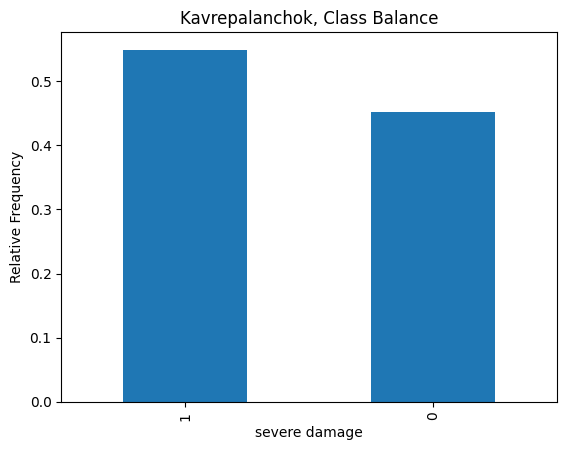

In [24]:
# Create a bar chart with the normalized value counts from the "severe_damage" column.
df["severe_damage"].value_counts(normalize=True).plot.bar()
plt.xlabel("severe damage")
plt.ylabel("Relative Frequency")
plt.title("Kavrepalanchok, Class Balance")

Text(0.5, 1.0, 'Kavrepalanchok, Plinth Area vs Building Damage')

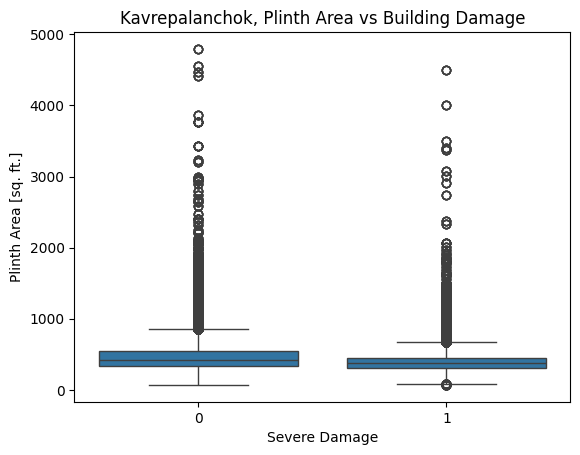

In [27]:
# create a boxplot that shows the distributions of the "plinth_area_sq_ft" column for both groups in the "severe_damage" column.

sns.boxplot(data=df, x="severe_damage", y="plinth_area_sq_ft")
plt.xlabel("Severe Damage")
plt.ylabel("Plinth Area [sq. ft.]")
plt.title("Kavrepalanchok, Plinth Area vs Building Damage")

In [28]:
#  Create a pivot table of df where the index is "roof_type" and the values come from the "severe_damage" column, aggregated by the mean.

roof_pivot = pd.pivot_table(df, index="roof_type", values="severe_damage")
roof_pivot

,severe_damage
roof_type,
Bamboo/Timber-Heavy roof,0.569477
Bamboo/Timber-Light roof,0.604842
RCC/RB/RBC,0.040715


In [29]:
# Create your feature matrix X and target vector y. Your target is "severe_damage".
# splitting training and testing

X = df.drop(columns = "severe_damage", axis=1)
y = df["severe_damage"]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (382665, 17)
y shape: (382665,)


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (306132, 17)
y_train shape: (306132,)
X_val shape: (76533, 17)
y_val shape: (76533,)


### Build Baseling Model

In [35]:
base = y_train.value_counts(normalize=True).max()
print(f'Baseline Model: {base.round(2)}')

Baseline Model: 0.55


For our model to perform well, we need to beat basline which is 0.55

In [37]:
# Create a model using LogisticRegression to predict building damage, including an appropriate encoder for categorical features. 

lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression()
)
lr.fit(X_train, y_train)

/home/jagannath/Learn Data Science With Advance Projects/learn/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration',
                                     'condition_post_eq', 'superstructure'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression())])

In [45]:
# Calculate training and validation accuracy score for model_lr.

acc_score = accuracy_score(y_train, lr.predict(X_train))
acc_score

0.766937138227954

In [46]:
val_score = accuracy_score(y_val, lr.predict(X_val))
val_score

0.7683090954228895

Accuracy score 0.76 means our model is performing well.


### Let's try and build another model i.e Decision tree. we don't know max_depth, so we'll just range random depth form 1 to 15.

In [49]:
param_depth = range(1, 16)
training_acc = []
testing_acc = []
for d in param_depth:
    dt_model = make_pipeline(OrdinalEncoder(),
                            DecisionTreeClassifier(max_depth=d, random_state=42))
    dt_model.fit(X_train, y_train)
    training_acc.append(dt_model.score(X_train, y_train))
    testing_acc.append(dt_model.score(X_val, y_val))

print(f'Training score: {training_acc[:3]}')
print(f'Validation score: {testing_acc[:3]}')                          

Training score: [1.0, 1.0, 1.0]
Validation score: [1.0, 1.0, 1.0]


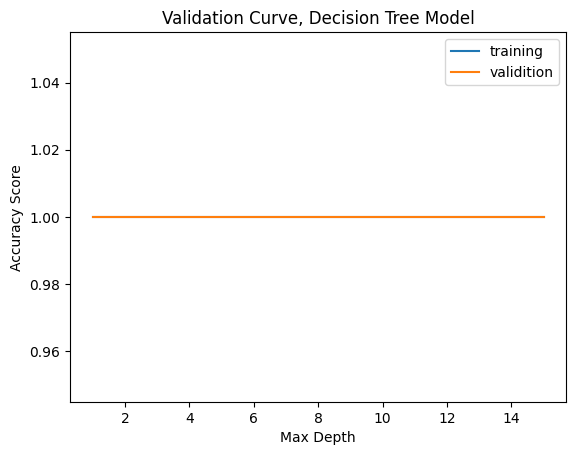

In [50]:
# Using the values in training_acc and validation_acc, plot the validation curve for dt_model

plt.plot(param_depth, training_acc, label="training")
plt.plot(param_depth, testing_acc, label="validition")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title("Validation Curve, Decision Tree Model")
plt.legend()

In [52]:
# Build and train a new decision tree model using appropriate max_depth
final_dt_model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=10, random_state=42)
)

final_dt_model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'condition_post_eq', 'superstructure'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'f...
Damaged-Rubble Clear-New building built    7
Covered by landslide                       8
NaN                                       -2
dtype: int64},
                                         {'col': 'superstructure',
                                          'data_type': dtype('O'),
                                          'mapping': Adobe/mud                1
Stone, mud mortar        2
Brick, cement mortar     3
RC, non-engineered       4
RC, engineered           5
Brick, mud mortar        6
Other                    7
Stone, cement mortar     8
Timber                   9
Bamboo                  10
Stone                   11
NaN                     -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [53]:
# Now let's predict 

y_pred = final_dt_model.predict(X_val)
y_pred[:5]

array([0, 1, 0, 1, 0])